### submitted by - Sanjana Pal

# Problem Statement

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import data
df = pd.read_csv('gas_turbines.csv')

# EDA

In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
# describe the data
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
# Some visulaization of data
[col for col in df.columns]

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

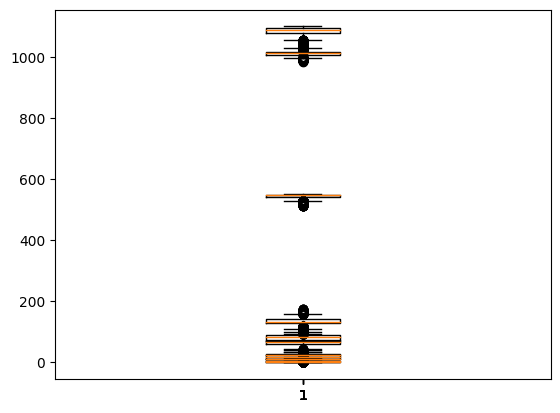

In [7]:
for i in df.columns:
  plt.boxplot(df[i])

<Axes: >

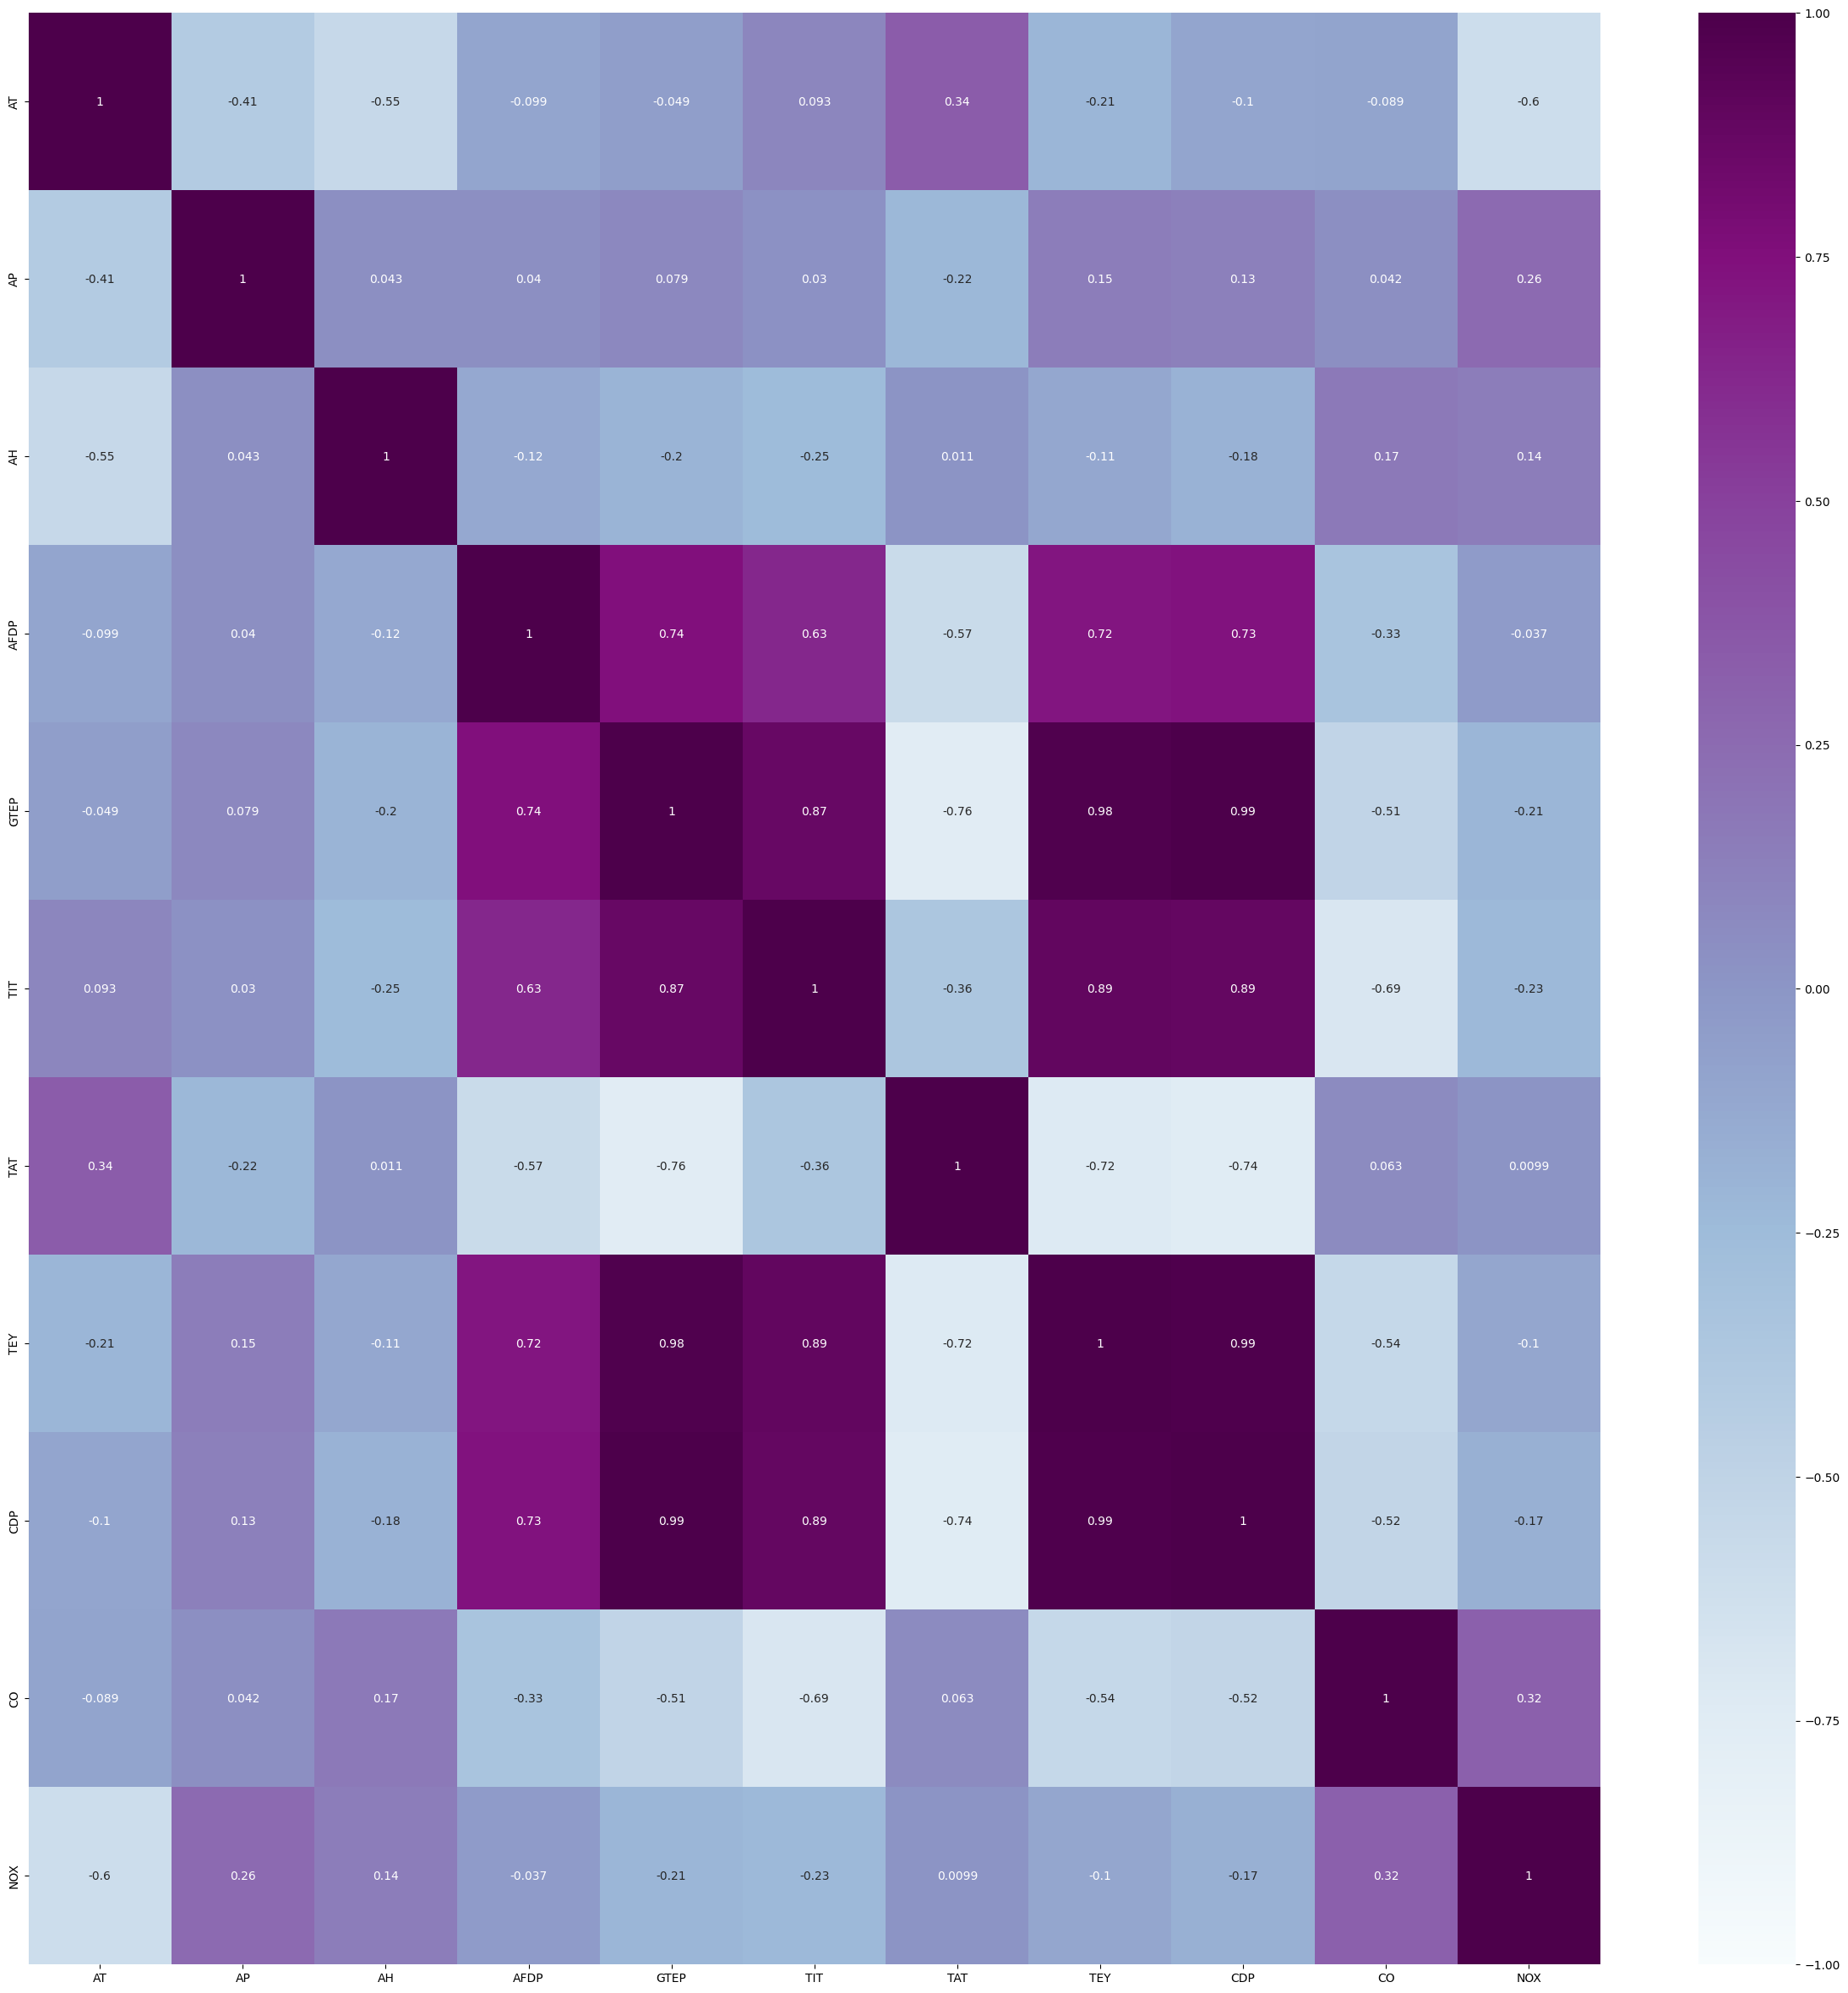

In [8]:
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(df.corr(),vmax=1,vmin=-1,annot=True , cmap='BuPu')

# Splitting Data

In [9]:
# Splitting Data
columns = [col for col in df.columns if col!='TEY'] + ['TEY']
df = df[columns]
x = df.drop('TEY',axis=1)
y = df['TEY']

In [10]:
columns

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX', 'TEY']

In [11]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [12]:
# Checking the feature importances using randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [13]:
rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [14]:
importances = rf.feature_importances_

In [15]:
# sorted the feature importances values
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_columns = df.columns[:-1][indices]


Text(0.5, 1.0, 'Features Importances Analysis Using Randomforest')

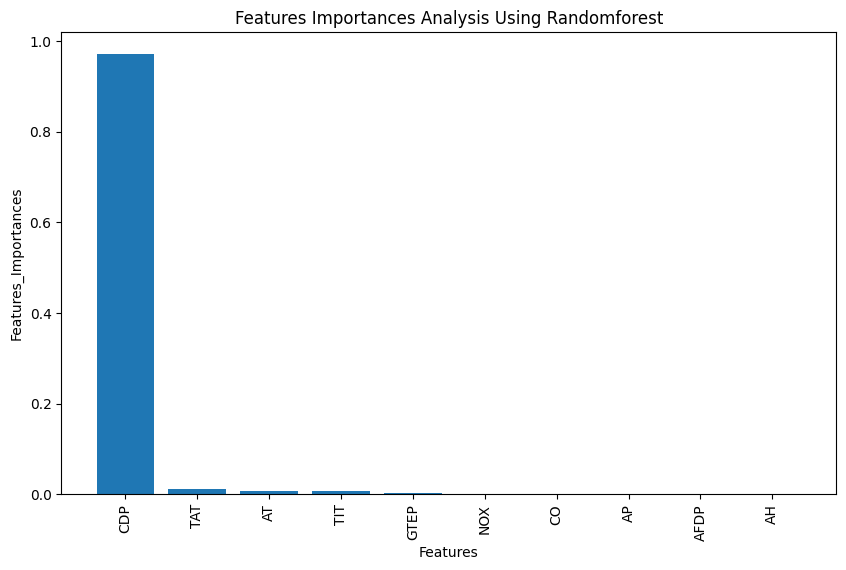

In [16]:
# bar plot of important features
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns,sorted_importances)
plt.xticks(rotation = 'vertical')
plt.xlabel('Features')
plt.ylabel('Features_Importances')
plt.title("Features Importances Analysis Using Randomforest")

In [17]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [18]:
# Performing PCA
pca = PCA()
pca.fit_transform(x)

array([[ 2.96312931e+00,  1.55278647e+00, -1.06151442e+00, ...,
         2.10231105e-02,  5.75152593e-03,  4.99791124e-03],
       [ 2.96650064e+00,  1.60538798e+00, -1.03505483e+00, ...,
         2.12055328e-02,  2.37244599e-02,  1.69962670e-03],
       [ 2.93921460e+00,  1.57503505e+00, -9.52600036e-01, ...,
         3.49260195e-02,  3.20799124e-02,  4.66997527e-03],
       ...,
       [ 3.82641073e+00,  2.87583876e+00, -4.33166707e-02, ...,
        -5.07757355e-01, -3.31627881e-02,  9.04937662e-03],
       [ 3.64983118e+00,  2.68240631e+00, -2.87732887e-01, ...,
        -5.85894357e-01, -6.26241771e-02, -1.91206134e-02],
       [ 3.47624530e+00,  2.31784601e+00, -5.07227467e-01, ...,
        -4.22289728e-01, -7.52319287e-02, -5.06006942e-02]])

In [19]:
pca.explained_variance_ratio_

array([4.35058425e-01, 2.25399195e-01, 9.84778419e-02, 8.90606453e-02,
       7.31692255e-02, 3.80313993e-02, 2.84670659e-02, 1.19359068e-02,
       2.82529035e-04, 1.17766369e-04])

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.43505842, 0.66045762, 0.75893546, 0.84799611, 0.92116533,
       0.95919673, 0.9876638 , 0.9995997 , 0.99988223, 1.        ])

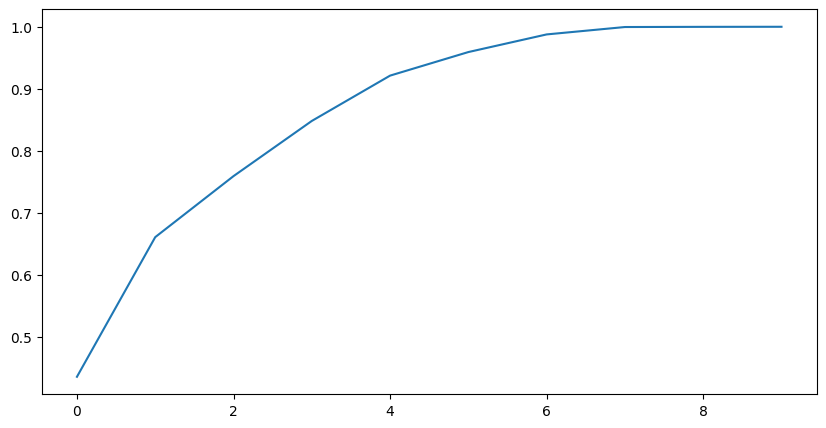

In [21]:
#scree plot
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

- In this plot we can see that,if we are selecting only four data it will give us 90% of information.

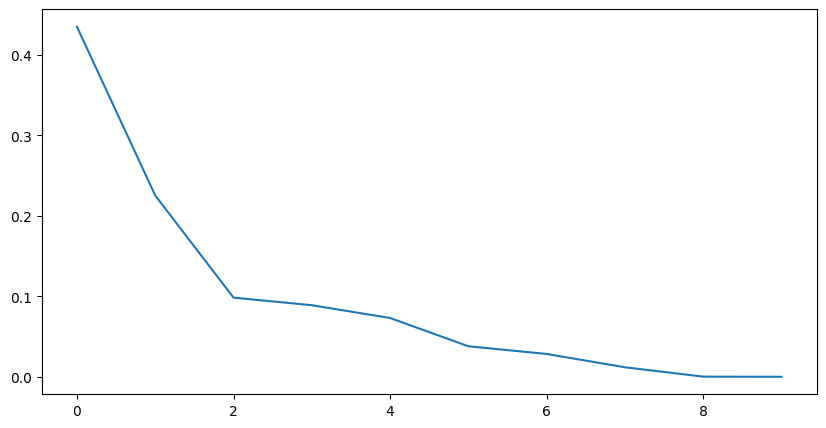

In [23]:
# elbow plot
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_)

# Model Building

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
xtrain

array([[ 0.63316263, -0.68625031, -1.84711155, ..., -0.0184495 ,
        -0.22545875,  0.59579029],
       [ 1.25607732, -1.5442114 , -1.08099723, ...,  0.17553872,
        -0.63966904, -0.46282941],
       [ 0.81047811, -0.18707295, -0.81622487, ...,  1.21709227,
        -0.53490029, -1.17274643],
       ...,
       [ 1.72834647, -1.06063333, -1.77330589, ..., -1.06000305,
        -0.36167927, -1.83892042],
       [-1.37537416,  0.9516754 , -0.1126061 , ...,  1.55974435,
        -0.40654609,  0.25109898],
       [ 0.51380806,  0.10931361,  0.89703789, ...,  0.59161625,
        -0.36469439, -0.85432004]])

In [34]:
# intialised the model
ann = Sequential()


# add dense layer
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=30, activation='relu'))

# add output layer
ann.add(Dense(units=1))

# Establish the connection between the layer
ann.compile(optimizer='adam',loss='mse')

#fit the data
ann.fit(xtrain,ytrain, epochs=100, validation_data = (xtest,ytest))

Epoch 1/100
329/329 [==============================] - 3s 6ms/step - loss: 10607.8223 - val_loss: 1407.3823
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 630.7753 - val_loss: 378.3742
Epoch 3/100
329/329 [==============================] - 1s 3ms/step - loss: 286.0198 - val_loss: 247.9468
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 196.3448 - val_loss: 179.4281
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 143.4786 - val_loss: 133.0871
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 106.5562 - val_loss: 99.5351
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 81.2100 - val_loss: 75.9040
Epoch 8/100
329/329 [==============================] - 1s 3ms/step - loss: 62.6495 - val_loss: 58.5227
Epoch 9/100
329/329 [==============================] - 1s 3ms/step - loss: 48.7514 - val_loss: 45.2508
Epoch 10/100
329/329 [==============================] - 1s 

### history.history function store the loss of training anf testing in a data frame.

In [35]:
loss = pd.DataFrame(ann.history.history)
loss

,loss,val_loss
0,10607.822266,1407.382324
1,630.775269,378.374237
2,286.019806,247.946777
3,196.344803,179.428116
4,143.478577,133.087112
...,...,...
95,0.409611,0.622947
96,0.423315,0.524885
97,0.414643,0.492209
98,0.408694,0.445075


In [36]:
ypred =  ann.predict(xtest)
ypred

141/141 [==============================] - 0s 1ms/step


array([[163.96844],
       [139.72276],
       [108.94183],
       ...,
       [134.73087],
       [110.05016],
       [134.0805 ]], dtype=float32)

In [37]:
r2_score(ytest,ypred)

0.9982462859899474

### As we saw R2_score is 0.9983 which is approximately 1 as r2_score is close to 1,Which shows the high correlation between the xtest and ypred.we can say that it is an good and reliable Model.IT predict the xtest very accurately.This can indicate that ANN regression model is performing expectionally very well.